#### sklearn.decomposition.PCA (비지도 학습으로 차원축소하기: PCA, SVD, NMF)
- class sklearn.decomposition.PCA(n_components=None(줄이고 싶은 피쳐의 갯수로,주축을 몇개로 잡을 것인가), *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
import pandas as pd

df_iris = pd.DataFrame(data=iris.data,columns=iris.feature_names)

df_iris['label'] = iris.target

df_iris.head(3)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_9520\2827492188.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


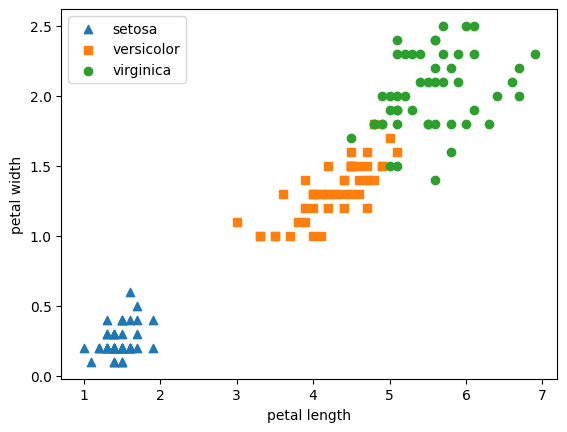

In [4]:
import matplotlib.pyplot as plt
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df_iris[df_iris['label'] == i]['petal length (cm)']
    y_axis_data = df_iris[df_iris['label'] == i]['petal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(iris.data)

In [7]:
df_scaled_iris = pd.DataFrame(data=X_scaled,columns=iris.feature_names)
df_scaled_iris['label'] = iris.target

In [8]:
df_scaled_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
iris_features_pca = pca.transform(X_scaled)

In [10]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [12]:
pca.singular_values_

array([20.92306556, 11.7091661 ])

In [13]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [14]:
pca_columns = ['pca_component_1','pca_component_2']

iris_features_pca = pd.DataFrame(iris_features_pca, columns=pca_columns)
iris_features_pca['target']= iris.target
iris_features_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


Text(0, 0.5, 'pca_component_2')

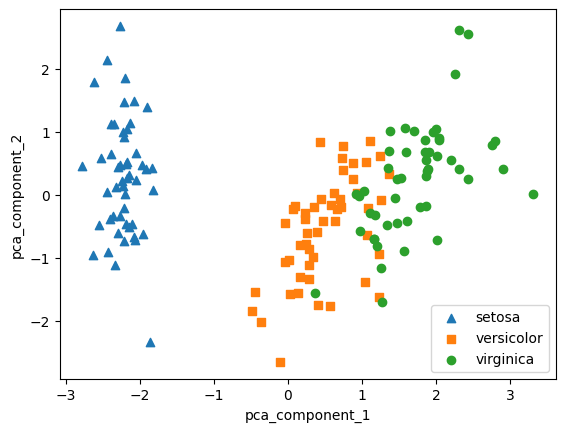

In [15]:
import matplotlib.pyplot as plt
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_features_pca[iris_features_pca['target'] == i]['pca_component_1']
    y_axis_data = iris_features_pca[iris_features_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.data)
iris_features_pca = pca.transform(iris.data)

In [17]:
pca_columns = ['pca_component_3','pca_component_4']

iris_features_pca = pd.DataFrame(iris_features_pca, columns=pca_columns)
iris_features_pca['target']= iris.target
iris_features_pca.head(3)

,pca_component_3,pca_component_4,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0


Text(0, 0.5, 'pca_component_4')

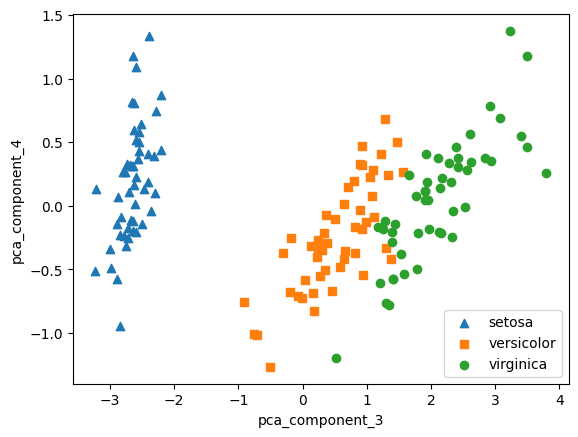

In [18]:
import matplotlib.pyplot as plt
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_features_pca[iris_features_pca['target'] == i]['pca_component_3']
    y_axis_data = iris_features_pca[iris_features_pca['target'] == i]['pca_component_4']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_3')
plt.ylabel('pca_component_4')